In [1]:
!pip install scikit-image


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from skimage.io import imread,imshow,imsave
from skimage.color import rgb2gray
from skimage.filters import gaussian

-------------------
# Contents MP1
- ### 1-D convolution (discrete) - [30 points]
- ### 2-D convolution (discrete) - [40 points]
- ### Edge detection in images using convolution filters - [30 points]
-----------------

# 1-D Convolution (Discrete)

    A convolution is an integral that expresses the amount of overlap of one function g as it is shifted over another function f. It therefore "blends" one function with another. For example, in synthesis imaging, the measured dirty map is a convolution of the "true" CLEAN map with the dirty beam.

[Tutorial](https://www.youtube.com/watch?v=yyTu0SXeW1M) 6:30
![Definition of Discrete Convolution 1-D](./resources/convolution_1d_definition.jpg)

By its definition (Eq 2), a convolution operation between two discrete finite arrays are to be done on an infinite range of index k ∈ Z from k = -inf to k = inf. 

As a convention, we will consider the array starts at k = 0, that is, the first element of the array A is A\[0\]. 

E.g.: Signal A: [2, -1, 6, 1, 7, -3, 2, 6]

A[0] = 2, A[1] = -1, A[2] = 6, ..., A[7] = 6

This conviniently goes along with the array indexing in python. But what to do for the undefined elements, such as A[-1] and A[8]? -1 and 8 are valid values for index k ∈ Z.

We will assume any undefined element to be 0 in the array. We will go into further detail about this choice in the next few cells.


A[0] = 2, A[1] = -1, A[2] = 6, ..., A[7] = 6

This conviniently goes along with the array indexing in python. But what to do for the undefined elements, such as A[-1] and A[8]? -1 and 8 are valid values for index k ∈ Z.

We will assume any undefined element to be 0 in the array. We will go into further detail about this choice in the next few cells.

### [Exercise] Manual 1-D Convolution Excercise - [5 points]

With the definition above, calculate the results of convolutions of signals A, B, and C with Kernel H.

Signal A: \[2, -4, 6, 1, 7, -3, 2, 6\]

Signal B: \[0, 1, 0, 1, 9, 3, -1\]

Signal C: \[0, 0, 0, 0, 1, 0, 0, 0, 0\]

Kernel H: \[1, 2, -1, 3\]

Hint: The result array might not start with index k == 0. Mark the starting index for each result. (See the Turotial Above)

In [5]:
## Code



import numpy as np

# Function to perform manual 1D convolution
def manual_convolution(signal, kernel):
    signal_len = len(signal)
    kernel_len = len(kernel)
    output_len = signal_len + kernel_len - 1  # The length of the output is signal_len + kernel_len - 1
    output = np.zeros(output_len)

    # Perform the convolution operation
    for i in range(output_len):
        for j in range(kernel_len):
            if i - j >= 0 and i - j < signal_len:
                output[i] += signal[i - j] * kernel[j]
    
    return output

# Define signals and kernel
signal_A = [2, -4, 6, 1, 7, -3, 2, 6]
signal_B = [0, 1, 0, 1, 9, 3, -1]
signal_C = [0, 0, 0, 0, 1, 0, 0, 0, 0]
kernel_H = [1, 2, -1, 3]

# Calculate convolutions
conv_A_H = manual_convolution(signal_A, kernel_H)
conv_B_H = manual_convolution(signal_B, kernel_H)
conv_C_H = manual_convolution(signal_C, kernel_H)

conv_A_H, conv_B_H, conv_C_H



(array([ 2.,  0., -4., 23., -9., 28., -8., 34.,  1.,  0., 18.]),
 array([ 0.,  1.,  2.,  0., 14., 20., -1., 22., 10., -3.]),
 array([ 0.,  0.,  0.,  0.,  1.,  2., -1.,  3.,  0.,  0.,  0.,  0.]))

### Answers: 

(\* denotes convolution operator.)

A * H = [ 2.,  0., -4., 23., -9., 28., -8., 34.,  1.,  0., 18.]

B * H = [ 0.,  1.,  2.,  0., 14., 20., -1., 22., 10., -3.]

C * H = [ 0.,  0.,  0.,  0.,  1.,  2., -1.,  3.,  0.,  0.,  0.,  0.]


### [Exercise] Convolution vs Cross-Correlation - [5 points]

![Definition of Discrete Correlation Filtering](./resources/correlation_1d_definition.jpg)

[1-D Convolution/Correlation Visualization](https://www.youtube.com/watch?v=O9-HN-yzsFQ) 0:36

Look at the definition of cross-correlation (Eq 4) and the visualization of the convolution and the cross-correlation examples. Compare the two operations.

What do you notice? In your words, how do the two operations differ from each other?

### Answer: 

Convolution and cross-correlation are similar operations, but they differ in one key way:

- **Convolution** flips the second signal (kernel) before sliding it over the first signal, which is commonly used for filtering and transforming signals.
- **Cross-correlation** does not flip the second signal; it simply slides it over the first signal, which is used to measure similarity between the two signals.

In short, the main difference is that convolution involves flipping the kernel, while cross-correlation does not.

### [Exercise] 1-D Discrete Convolution in Python - [20 points]

Many common math/science Python packages offer optimized implementation of convolution function. Below is an example of Numpy's convolve function

In [6]:
X = np.array([0, 1, 2, 3, 4])
H = np.array([0, 0.5, 1])

# Read: https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
Y = np.convolve(X, H, mode="full")
Y_reverse = np.convolve(H, X, mode="full")

print(Y)
print(Y_reverse)

[0.  0.  0.5 2.  3.5 5.  4. ]
[0.  0.  0.5 2.  3.5 5.  4. ]


Now lets implement the 1-D convolution function corresponding to numpy's "full" mode in the cell below. However, the only numpy functions you can use are:
```
np.array()
np.zeros()
np.ones()
```

**Do not change the function signature (function name, return type, and input parameters)**

In [7]:
def conv1d(X, H):
    '''
    Returns the result Y = X * H, where * is the 1-D convolution operator. (following variable convention in Eq 2)

        Parameters:
                X (array): Input data/signal
                H (array): Convolution kernel/signal

        Returns:
                Y (array): Convolution result similar to "full" mode in np.convolve()
    '''
    # Length of the input signal and kernel
    len_X = len(X)
    len_H = len(H)
    
    # Length of the output in "full" mode (signal length + kernel length - 1)
    len_Y = len_X + len_H - 1
    
    # Initialize the output array with zeros
    Y = np.zeros(len_Y)
    
    # Perform the convolution operation (without using any numpy convolve-like functions)
    for i in range(len_Y):
        for j in range(len_H):
            if (i - j) >= 0 and (i - j) < len_X:
                Y[i] += X[i - j] * H[j]
    
    return Y

# Test the function with a simple example
X = np.array([2, -4, 6, 1, 7, -3, 2, 6])
H = np.array([1, 2, -1, 3])
conv1d_result = conv1d(X, H)
conv1d_result


array([ 2.,  0., -4., 23., -9., 28., -8., 34.,  1.,  0., 18.])

Now check your result by comparing it with ```np.convolve```. Notice that this is not a comprehensive test. You are encouraged to make your own testcases.

In [8]:
print("Correct (Numpy) Result:")
np_result = np.convolve(X, H, mode="full")
print(np_result)

print()

print("Your Answer:")
your_result = conv1d(X, H)
print(your_result)


print("\nYour result is {}".format("correct!" if np.array_equal(np_result, your_result) else "incorrect."))

Correct (Numpy) Result:
[ 2  0 -4 23 -9 28 -8 34  1  0 18]

Your Answer:
[ 2.  0. -4. 23. -9. 28. -8. 34.  1.  0. 18.]

Your result is correct!


-----------------

# 2-D Convolution (Discrete)

![2-D Discrete Convolution Definition](./resources/convolution_2d_definition.jpg)

### Definition

Watch this 2-D discrete convolution example. [2-D Discrete Convolution Example](https://www.youtube.com/watch?v=_iZ3Q7VXiGI) 

Notice two things:

1. The convolution kernel is already flipped. By definition, the result of ```A (*convolve) B ``` is exactly the same as ```A (*cross-correlate) B'```, where ```B'``` is ```B``` flipped. [Read a little more about this](https://cs.stackexchange.com/questions/11591/2d-convolution-flipping-the-kernel). Therefore what we really see in the video is the cross-correlation of the Input image and the flipped kernel. This will continue to be the theme in this tutorial and in many discussions about convolution you'll see online.
2. The presenter uses the "valid" padding mode, meaning he will not consider the undefined elements of the input (no padding around the input). This contrasts other padding modes "full" and "same". You can read more about these modes at https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html


### Padding

[Convolution Padding Explanation](https://www.youtube.com/watch?v=6v05kAtV1M0) 11:13

![Different Padding Modes](./resources/0rs9l.gif)

### [Exercise] 2-D Discrete Convolution in Python - [40 points]

Now go ahead and implement the 2-D convolution function in the cell below. However, the only numpy functions you can use are:
```
np.array()
np.flipud()
np.fliplr()
np.zeros()
np.ones()
np.sum()
```
Typically, in image processing tasks, we want to preserve size of input after the convolution operation. **Therefore, your code should implement the "same" mode convolution here. You can assume stride=1 and padding fillvalue=0. You will need to figure out how much 0-padding you need based on the difference in the image and kernel size.** You can review https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html for reference.

**Do not change the function signature (function name, return type, and input parameters)**

In [9]:
def conv2d(image, kernel):
    '''
    Returns the result Y = image * kernel, where * is the 2-D convolution operator.

        Parameters:
                image (ndarray): 2-D input image/signal
                kernel (ndarray): 2-D convolution kernel/signal

        Returns:
                Y (ndarray): 2-D convolution result similar to "same" mode in scipy/numpy.
    '''
    # Get dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Flip the kernel both vertically and horizontally
    kernel = np.flipud(np.fliplr(kernel))

    # Calculate the padding size for "same" mode
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Create a padded version of the image
    padded_image = np.zeros((image_height + 2 * pad_height, image_width + 2 * pad_width))
    padded_image[pad_height:image_height + pad_height, pad_width:image_width + pad_width] = image

    # Create an output array with the same size as the original image
    output = np.zeros((image_height, image_width))

    # Perform the convolution operation
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest from the padded image
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # Perform element-wise multiplication and sum the result
            output[i, j] = np.sum(region * kernel)

    return output

# Test the function with an example
image = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

conv2d_result = conv2d(image, kernel)
conv2d_result


array([[  7.,   4.,  -7.],
       [ 15.,   6., -15.],
       [ 13.,   4., -13.]])

Now check your result by comparing it with ```scipy.signal.convolve2d```.

Notice that this is not a comprehensive test. You are encouraged to make your own testcases.

In [10]:
image = np.array([[1,2,3],[2,3,4],[4,4,4],[-1,0,1]]) # 4 x 3
kernel = np.array([[1,2],[2,3.7]]) # 2 x 2

print("Correct (Scipy) Result:")
from scipy.signal import convolve2d
np_result = convolve2d(image, kernel, mode="same", boundary='fill', fillvalue=0)
print(np_result) # 4 x 3 - same as input since mode="same"

print()

print("Your Answer:")
your_result = conv2d(image, kernel)
print(your_result)

print("\nYour result is {}".format("correct!" if np.array_equal(
    np_result, your_result) else "incorrect."))

Correct (Scipy) Result:
[[ 1.   4.   7. ]
 [ 4.  14.7 23.4]
 [ 8.  25.4 31.1]
 [ 7.  20.8 23.8]]

Your Answer:
[[ 1.   4.   7. ]
 [ 4.  14.7 23.4]
 [ 8.  25.4 31.1]
 [ 7.  20.8 23.8]]

Your result is correct!


------------------

# Edge Detection in Images with Convolution

First download these sample images

In [11]:
!curl "https://i.insider.com/56e7f946dd0895595d8b4792?width=700&format=jpeg&auto=webp" --output go.jpg
!curl "https://upload.wikimedia.org/wikipedia/commons/e/ef/MRI_Head_Brain_Normal.jpg" --output brain.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59210  100 59210    0     0   176k      0 --:--:-- --:--:-- --:--:--  176k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  195k  100  195k    0     0   390k      0 --:--:-- --:--:-- --:--:--  390k


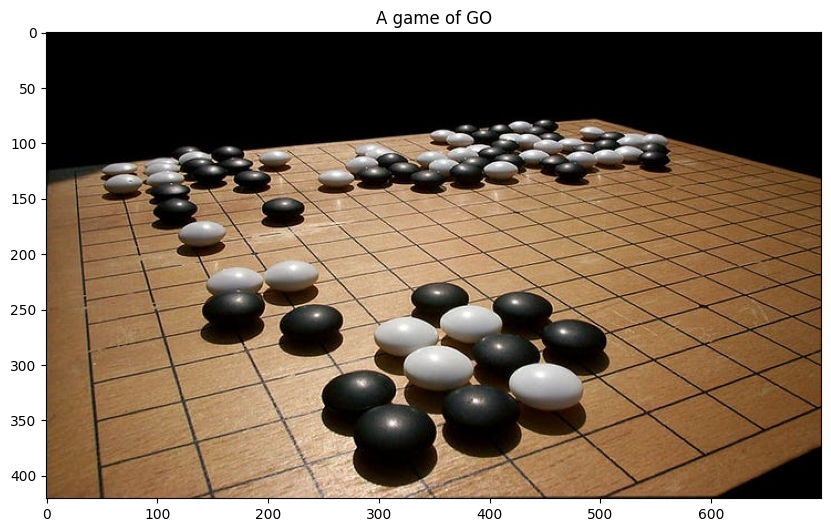

In [12]:
go = imread('go.jpg')
plt.figure(figsize=(10,10))
plt.title("A game of GO")
plt.imshow(go)
plt.show()

Let's convert the colored image to gray-scale by combining 3 R, G, and B channels to one.

This can be conveniently done with the "skimage.color.rgb2gray" function.

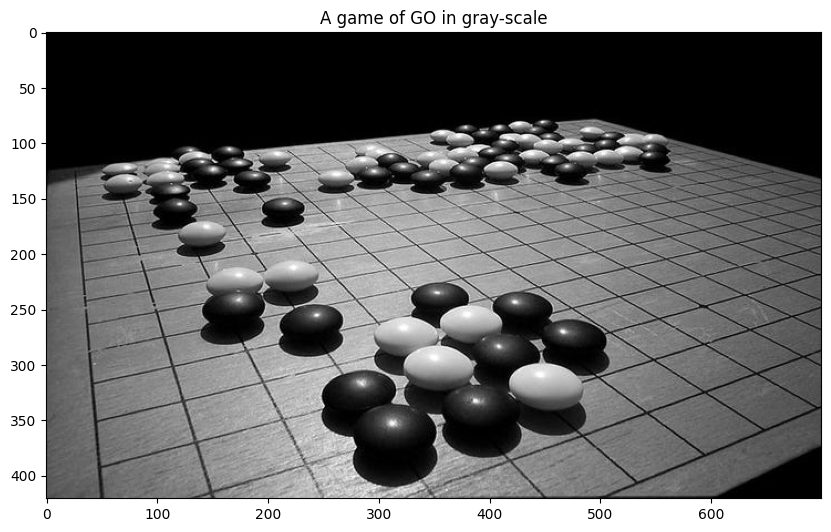

In [13]:
go_gray = rgb2gray(go)
plt.figure(figsize=(10,10))
plt.gray()
plt.title("A game of GO in gray-scale")
plt.imshow(go_gray)
plt.show()

### [Exercise] Let's define some helper functions used for the rest of the assignment - [5 points]

In [14]:
def plot_student_vs_scipy(image, kernel, student_f, scipy_f):
    '''
    Wrapper function that computes convolution using both student's and scipy versions and plots both results side-by-side for comparison.

        Parameters:
                image (array): 2-D input image/signal
                kernel (array): 2-D convolution kernel/signal
                student_f (function): the student's own convolution function
                scipy_f (function): the scipy convolution function

        Returns:
                None
    '''
    # Timing and computing student implementation
    start_time = time.time()
    student_result = student_f(image, kernel)
    student_time = time.time() - start_time

    # Timing and computing scipy implementation
    start_time = time.time()
    scipy_result = scipy_f(image, kernel, mode='same')
    scipy_time = time.time() - start_time

    # Plotting the results side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].imshow(student_result, cmap='gray')
    axes[0].set_title(f"Student Convolution (Time: {student_time:.5f}s)")
    
    axes[1].imshow(scipy_result, cmap='gray')
    axes[1].set_title(f"Scipy Convolution (Time: {scipy_time:.5f}s)")
    
    plt.show()

    return None

# check the difference in execution time between your implementation and numpy/scipy versions (refer to Labs for timing-related code)

### [Exercise] Study the construction of the given filters/kernels - [5 points]

In [15]:
prewitt_y = np.array([[-1., -1., -1.],
                      [0.,0.,0.],
                      [1.,1.,1.]])
prewitt_x = prewitt_y.T # transpose operator

sobel_y = np.array([[-1.,-2.,-1.],
                    [0.,0.,0.],
                    [1.,2.,1.]])
sobel_x = sobel_y.T # transpose operator

Describe the effect of the two filters.

Do you notice any difference?

Can you give an explanation?

**Your Answer:** 

Prewitt and Sobel filters are used for edge detection in images:

Prewitt filters: Detect vertical and horizontal edges with equal weights for all pixels, making them simpler and faster, but less accurate.
Sobel filters: Give more weight to the center pixels, making them more sensitive to strong edges and better at handling noise.
Overall, Sobel filters are generally preferred because they provide stronger and clearer edge detection, especially in noisy images.



You can use the wrapper function to visually check the effect of the filters

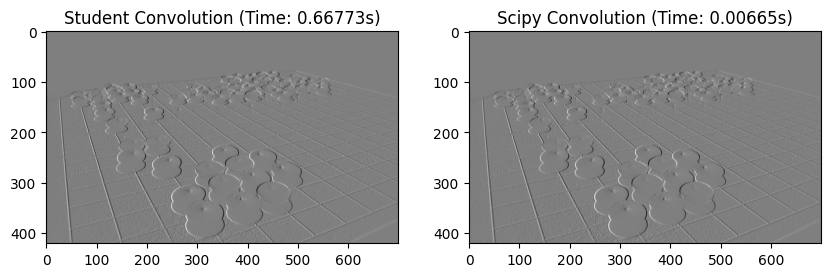

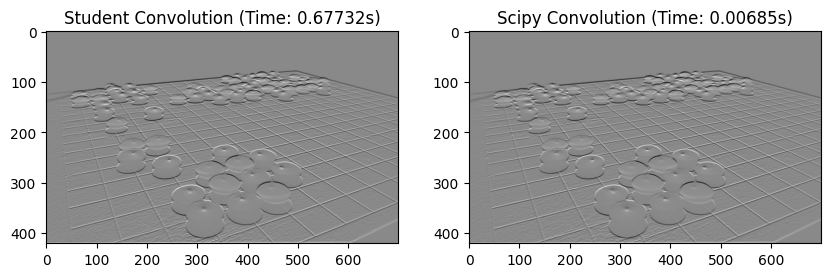

In [18]:
import scipy
import time


student_f = conv2d
scipy_f = scipy.signal.convolve2d

plot_student_vs_scipy(go_gray, prewitt_x, student_f, scipy_f)
plot_student_vs_scipy(go_gray, prewitt_y, student_f, scipy_f)


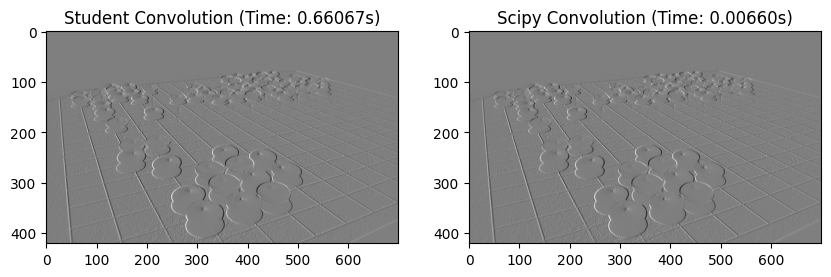

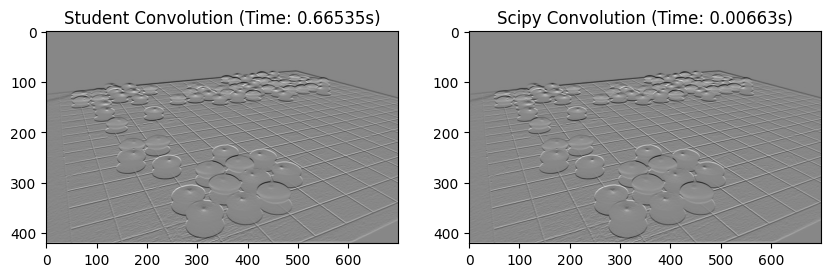

In [19]:
plot_student_vs_scipy(go_gray, sobel_x, student_f, scipy_f)
plot_student_vs_scipy(go_gray, sobel_y, student_f, scipy_f)


### [Exercise] Design a new filter/kernel and explain what its effect is - [10 points]

Can you make a new 3 by 3 edge detection filter similar to the ones above?

Hint: make sure the sum of all elements in your filter is 0, so that the result image has the same overall magnitude as the input.

In [20]:
your_filter = np.array([[1.,  1.,  1.],
                      [0.,  0.,  0.],
                      [-1., -1., -1.]])

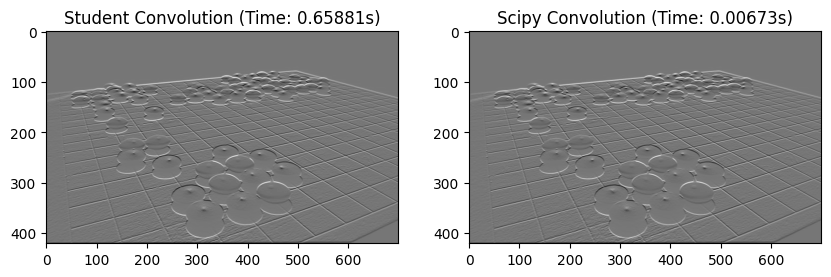

In [21]:
plot_student_vs_scipy(go_gray, your_filter, student_f, scipy_f)

In [ ]:
# The new filter detects horizontal edges by highlighting vertical changes in pixel intensity. 
# The positive top row and negative bottom row create contrast when there's a vertical gradient, while the filter's 
# sum of 0 ensures the output image maintains the same overall intensity as the input.

## [Exercise] Combine the two orientations of the non-symmetrical filters by applying pythagorean addition - [5 points]

Pseudocode for combining filters f1 and f2 to get a new filter f3:
```
f3 = sqrt(f1^2 + f2^2)
```

In [23]:
def combine_filter(f1, f2):
    
        '''
    Combines f1 and f2 using above pseudocode.

        Parameters:
                f1 (array): filter 1
                f2 (array): filter 2

        Returns:
                f3 (array): filter 3
                
    '''

        f3 = np.sqrt(np.square(f1) + np.square(f2))
        return f3
    


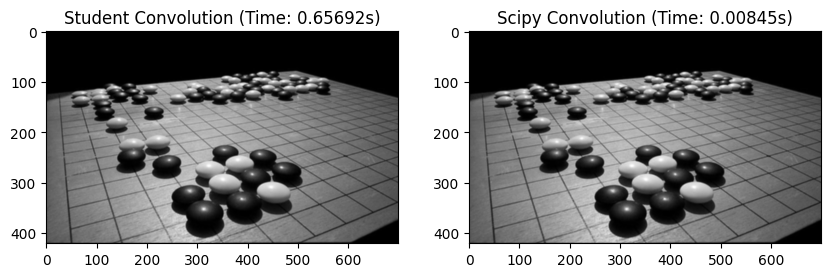

In [24]:
sobel_combined = combine_filter(sobel_y, sobel_x)
plot_student_vs_scipy(go_gray, sobel_combined, student_f, scipy_f)

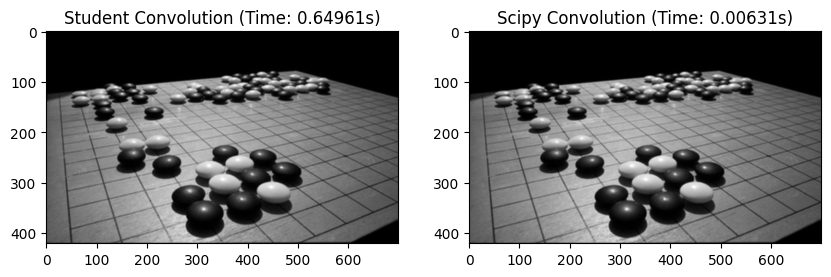

In [25]:
prewitt_combined = combine_filter(prewitt_y, prewitt_x)
plot_student_vs_scipy(go_gray, prewitt_combined, student_f, scipy_f)

### [Exercise] Apply 1) Sobel, 2) Prewitt, and 3) their respective combined filters to the brain image and plot the results - [5 points]

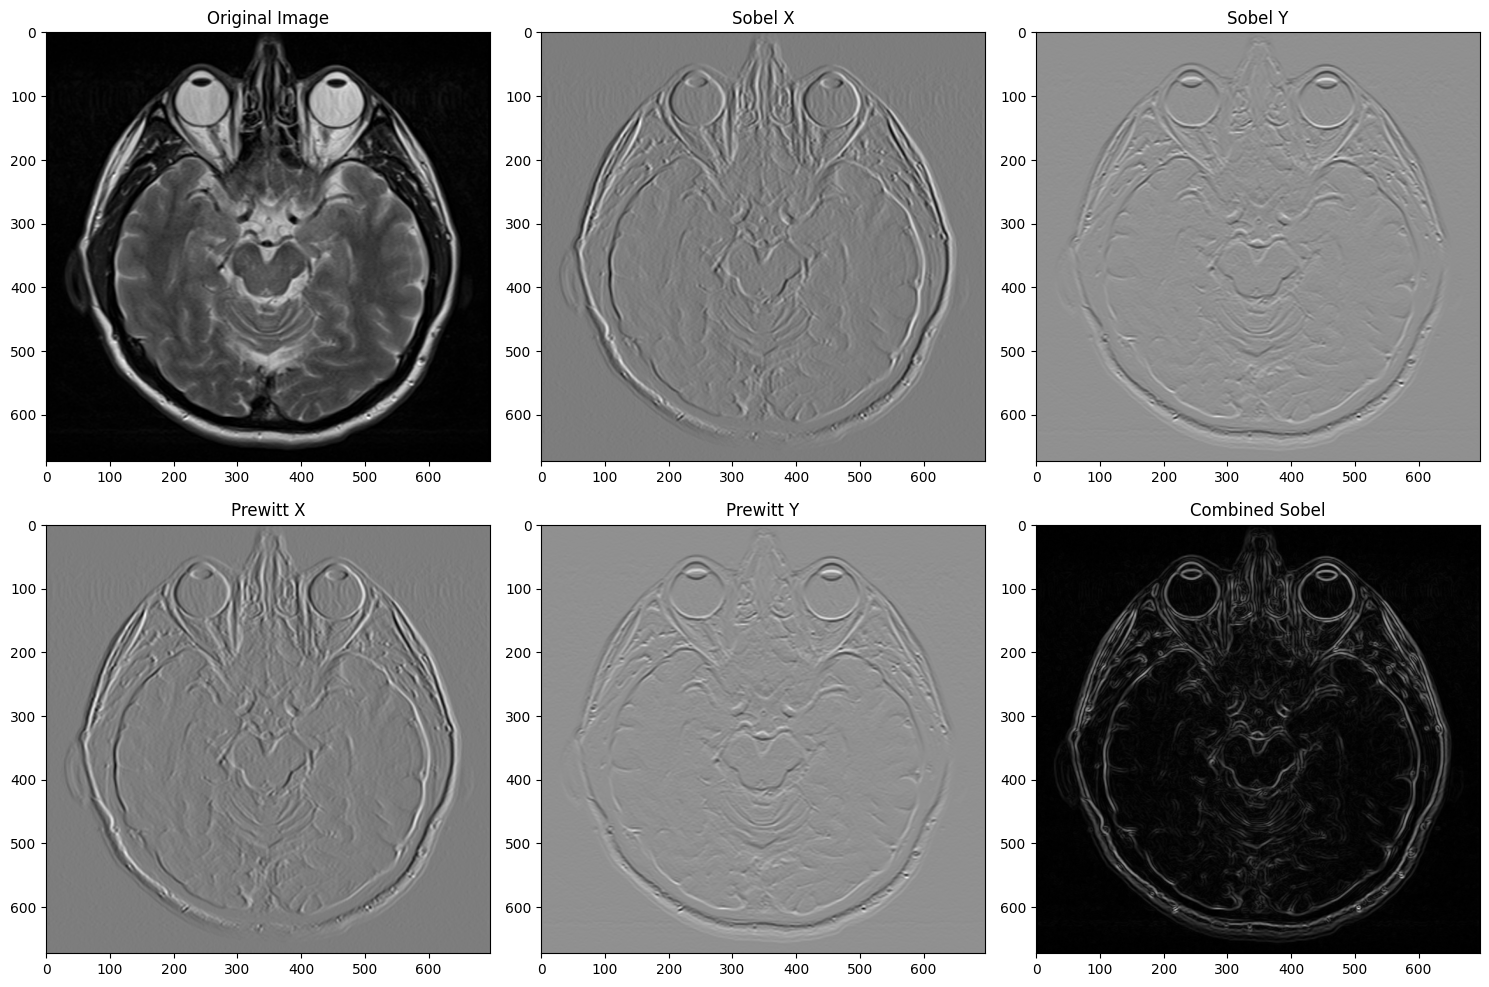

In [28]:
# import numpy as np
# import matplotlib.pyplot as plt
from scipy.ndimage import convolve
# from skimage.color import rgb2gray
# from skimage.io import imread


brain = rgb2gray(imread("brain.jpg"))

# Define Sobel filters
sobel_y = np.array([[-1., -2., -1.],
                    [ 0.,  0.,  0.],
                    [ 1.,  2.,  1.]])
sobel_x = sobel_y.T

# Define Prewitt filters
prewitt_y = np.array([[-1., -1., -1.],
                      [ 0.,  0.,  0.],
                      [ 1.,  1.,  1.]])
prewitt_x = prewitt_y.T

# Function to combine two filters
def combine_filter(f1, f2):
    return np.sqrt(np.square(f1) + np.square(f2))


# Apply Sobel filters
sobel_x_result = convolve(brain, sobel_x)
sobel_y_result = convolve(brain, sobel_y)
sobel_combined = combine_filter(sobel_x_result, sobel_y_result)

# Apply Prewitt filters
prewitt_x_result = convolve(brain, prewitt_x)
prewitt_y_result = convolve(brain, prewitt_y)
prewitt_combined = combine_filter(prewitt_x_result, prewitt_y_result)



fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axs[0, 0].imshow(brain, cmap='gray')
axs[0, 0].set_title('Original Image')

# Sobel results
axs[0, 1].imshow(sobel_x_result, cmap='gray')
axs[0, 1].set_title('Sobel X')

axs[0, 2].imshow(sobel_y_result, cmap='gray')
axs[0, 2].set_title('Sobel Y')

# Prewitt results
axs[1, 0].imshow(prewitt_x_result, cmap='gray')
axs[1, 0].set_title('Prewitt X')

axs[1, 1].imshow(prewitt_y_result, cmap='gray')
axs[1, 1].set_title('Prewitt Y')

# Combined filter results
axs[1, 2].imshow(sobel_combined, cmap='gray')
axs[1, 2].set_title('Combined Sobel')

plt.tight_layout()  
plt.show()
